# LAB Sheet-04 : Naive Bayes Classifier

### Submitted by : Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

In this LAB Sheet we will do some data visualisation and preprocessing steps on the $\texttt{pima-indians-diabetes.csv}$ dataset whcih we studied in last LAB sheet. Then we will buld a [$\textbf{Naive Bayes Classifier}$](https://www.javatpoint.com/machine-learning-naive-bayes-classifier) using the preprocessed dataset. Finally we will analyse the model performance interms of $\textit{accuracy, precision, recall}$ and $\textit{f-score}$.

## Required packages

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function 
from sklearn.model_selection import train_test_split

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report


## Reading the dataset

Read the dataset $\texttt{'pima-indians-diabetes.csv'}$  using $\texttt{pandas}$ and store it in $\texttt{diabetes_data}$ variable.

In [2]:
# your code solution here
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')

## Overview of the dataset

Print the first 10 rows of the data to check the correctness in previous step

In [3]:
# your code solution here
diabetes_data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

Obtain a statistical $\texttt{description}$ of the data as shown in cell output below

(hint : Use $\texttt{describe()}$ function)

In [7]:
# your code solution here
diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Analyzing the Data using Visualization Tools 

Plot thhe histogram of the attributes 

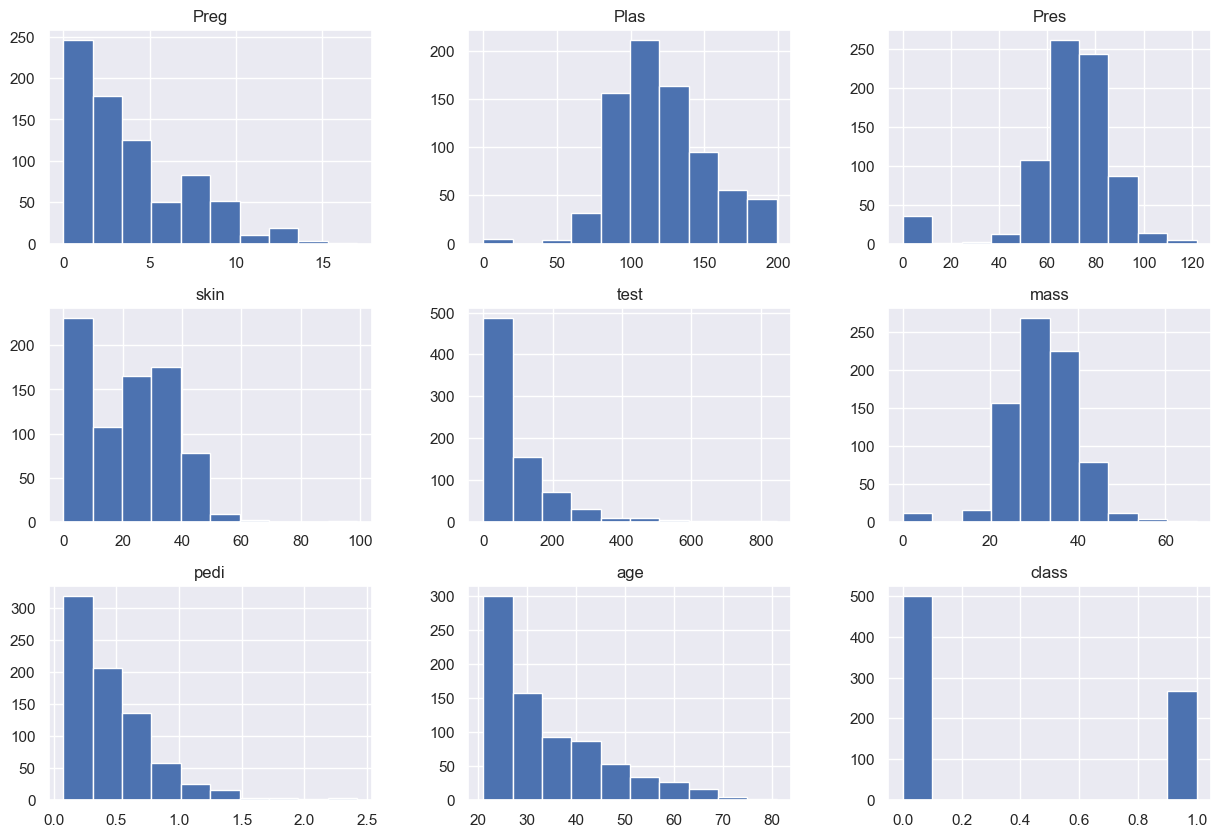

In [8]:
# your code solution here
diabetes_data.hist(figsize = [15, 10], color = 'b')
plt.show()

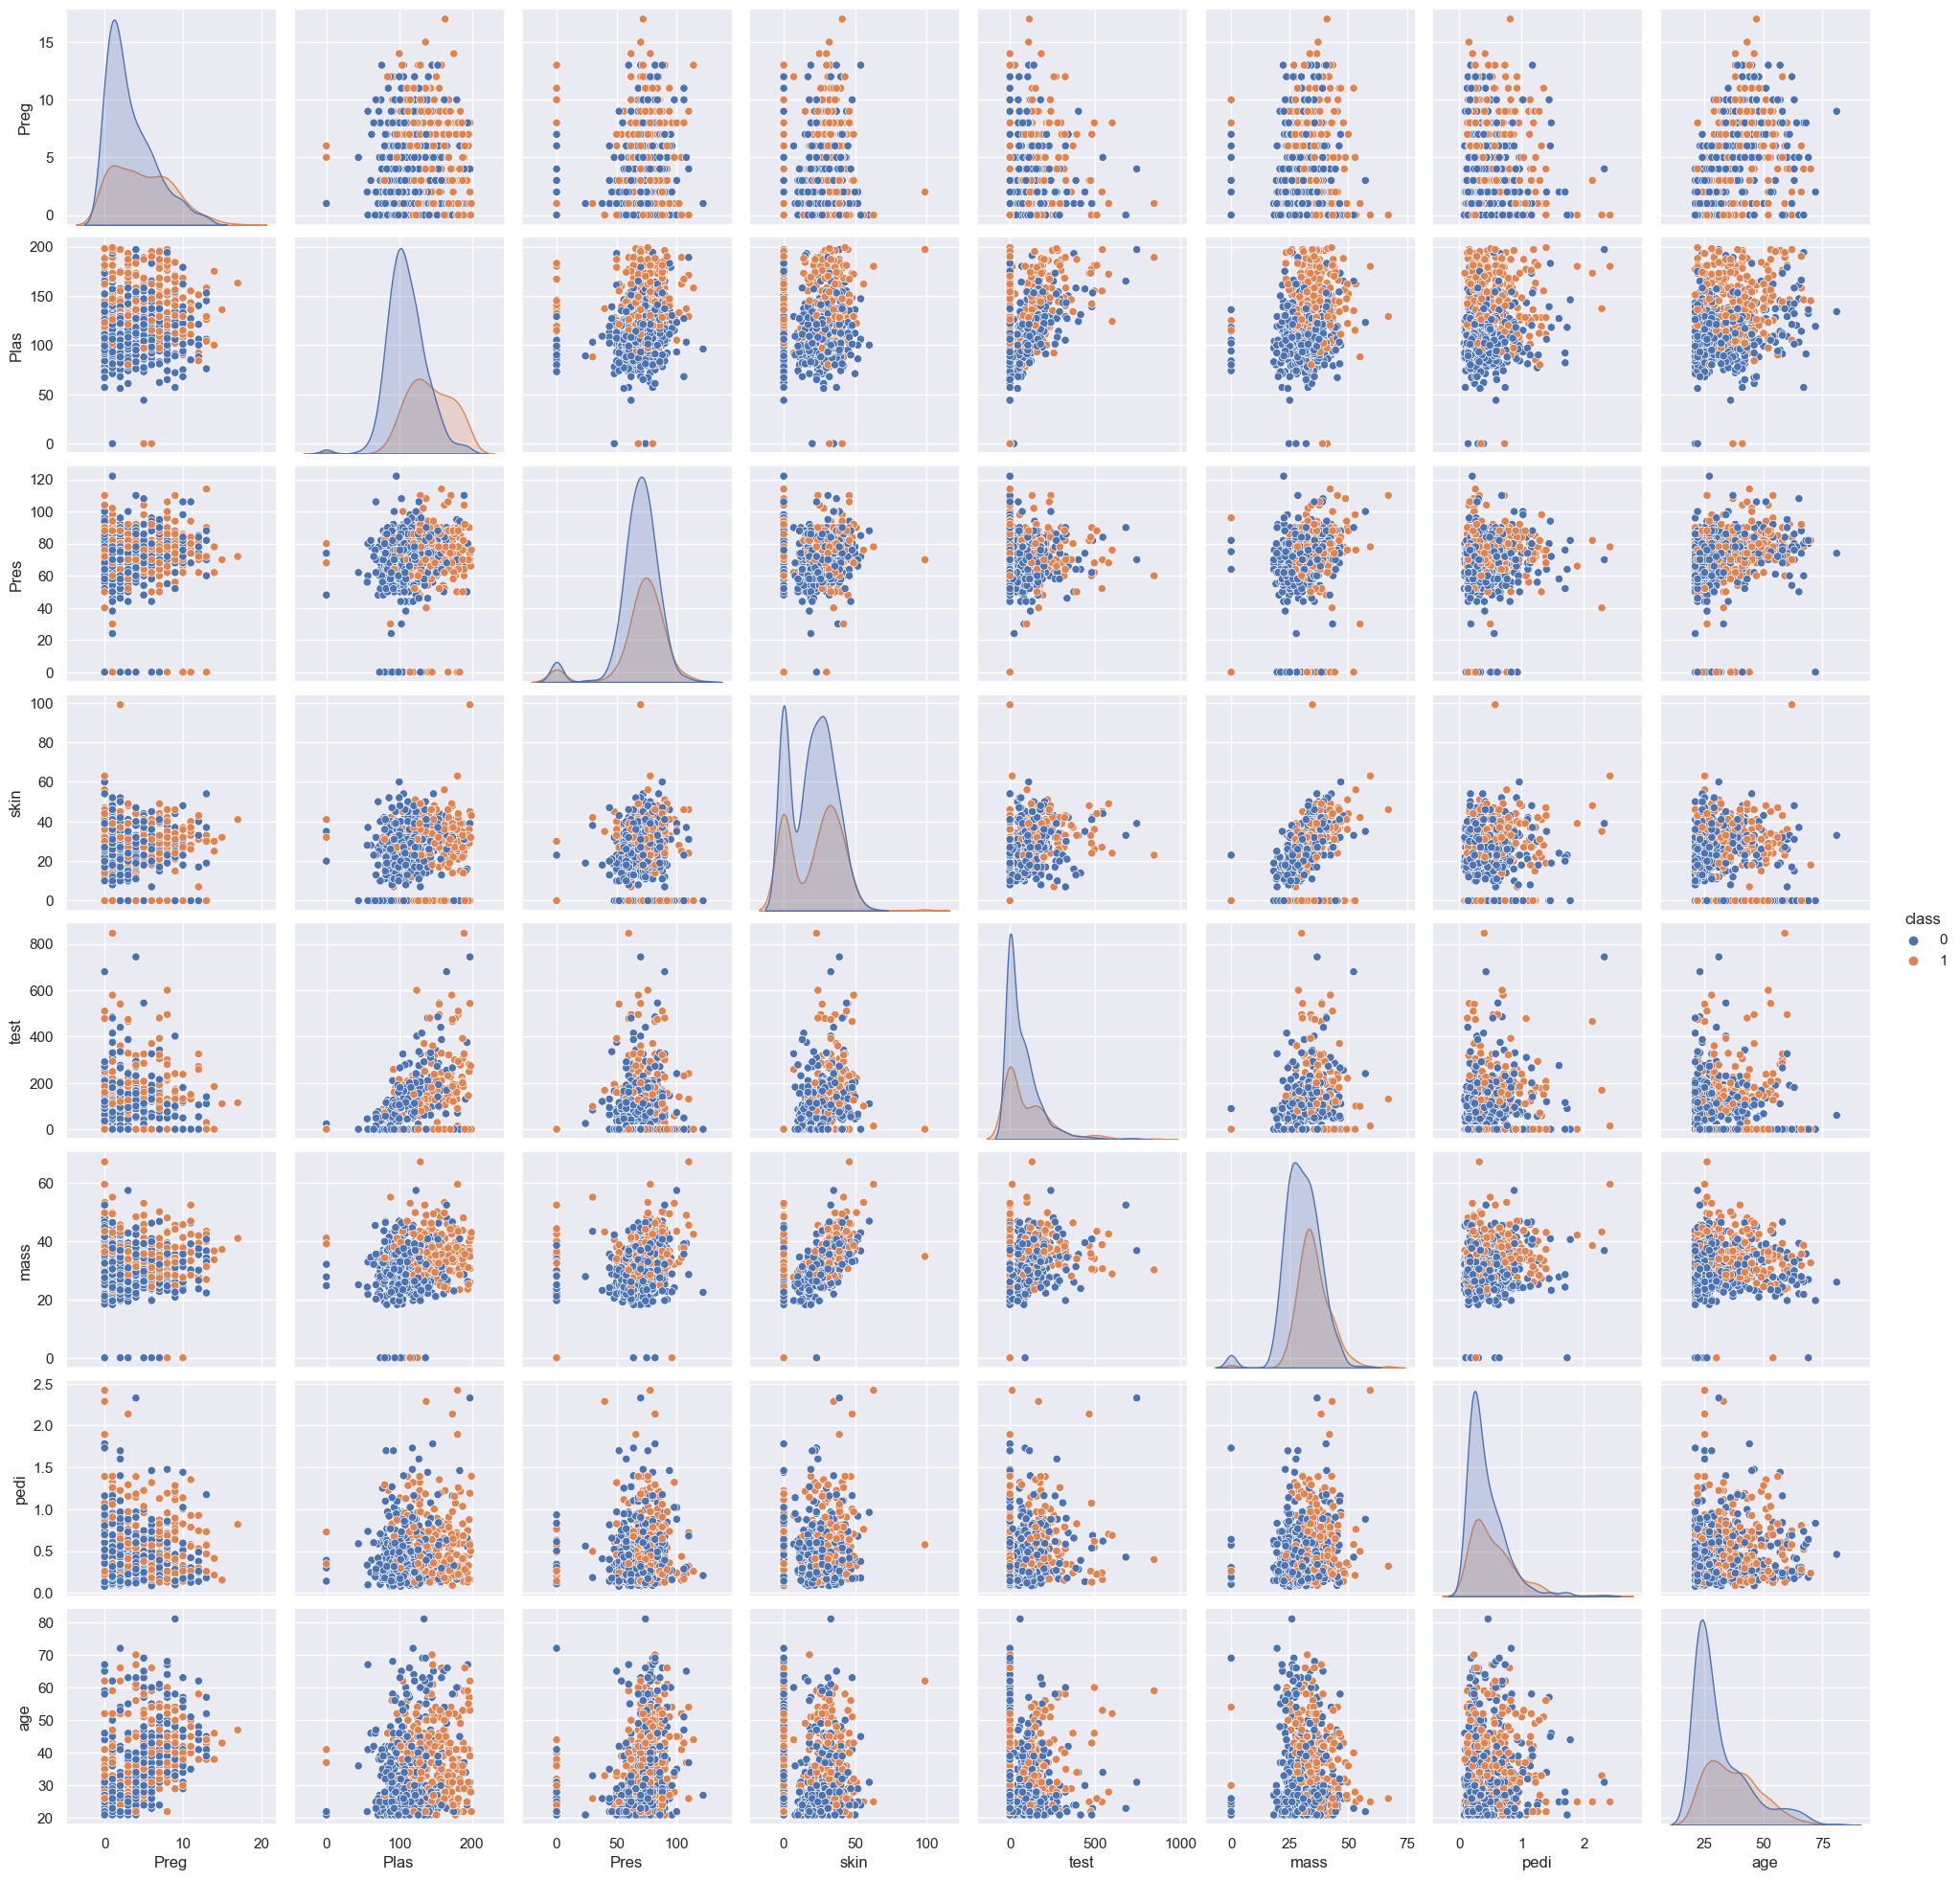

In [9]:
# scatter plot (which shows the relationship between the attributes)
sns.pairplot(diabetes_data, hue="class");

In [10]:
# correlation matrix
cor=diabetes_data.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


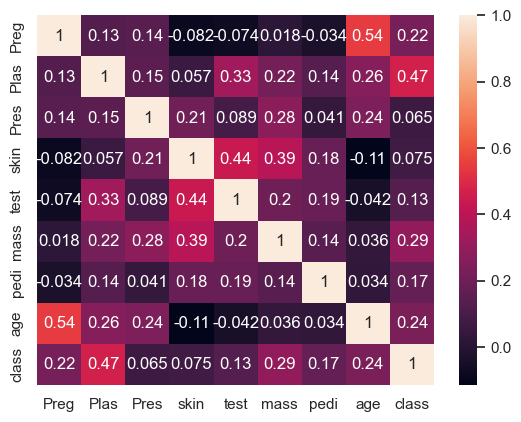

In [11]:
sns.heatmap(cor, annot=True);

## Data Wrangling

In [12]:
# Check the missing values in the dataset
diabetes_data.isnull().values.any()

False

It shows there are no null values but 0 is not considered in Null here but we know that 0 can also be the missing value, so we replace 0 by Nan

In [13]:
diabetes_data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Replace 0 to NaN in the data and print first 15 rows of the replaced data.

(hint : use $\texttt{replace}$ function)

In [14]:
# your code solution here
columns_to_replace = diabetes_data.columns[0:-1]
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)
diabetes_data.head(15)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [15]:
diabetes_data.isnull().sum()

Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

Now replace the NaN to median for $\texttt{'Plas', 'Pres', 'skin', 'test', 'mass'}$ attributes. Print the replaced data.

(hint: Use [$\texttt{pandas.DataFrame.fillna}$](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function)

In [16]:
# your code solution here
for i in ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'age']:
    diabetes_data[i].fillna(diabetes_data[i].median(), inplace=True)
diabetes_data.head(15)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1


Heatmap, lines showing the null/0 values

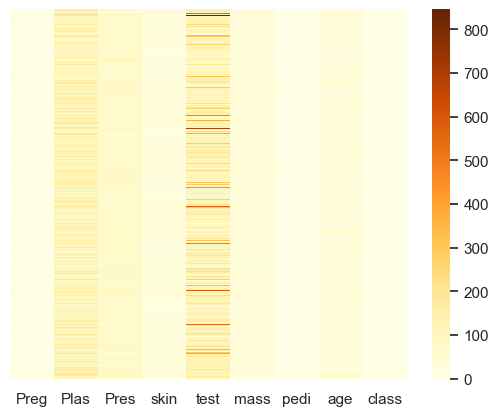

In [17]:
sns.heatmap(diabetes_data, yticklabels=False, cmap="YlOrBr");

Finding the max_age in the dataset

In [18]:
maxvalues = diabetes_data.max()
maxvalues

Preg      17.00
Plas     199.00
Pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64

Divide the age into bins as follows 
$(20, 39] \rightarrow 1 \\
(40, 59] \rightarrow 2 \\
(60, 81] \rightarrow 3$ 
Define a function $\texttt{age}$ which take as input the dataframe and returns the binned data.

(hint: use $\texttt{pandas.DataFrame.loc}$)

In [19]:
# your code solution here
def bin_column(df, col_name):
    j = 0
    for i in df[col_name]:
        if i > 60:
            df[col_name].values[j] = 3
        elif i > 40:
            df[col_name].values[j] = 2
        else:
            df[col_name].values[j] = 1
        j += 1

bin_column(diabetes_data, 'age')
diabetes_data

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,2,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,1,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,1,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,1,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,3,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,1,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,1,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,2,1


## Model Building

Split the dataset into input(use variable X) and output(use variable y). Input is the first 8 columns and output is the ninth column. Print the input.

In [20]:
# your code soilution here
array = diabetes_data.values
X = array[:, 0:8]
y = array[:, 8]

Split X and y into training and test set in 70:30 ratio. Store them in variables $\texttt{X_train,X_test,y_train,y_test}$

(hint: Use [$\texttt{train_test_split}$](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [21]:
# your code solution here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Scaling

In [22]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Managing the imbalance class

Read about [SMOTE](https://towardsdatascience.com/smote-fdce2f605729)

In [23]:
Ov_sampling=SMOTE(random_state=0)
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_resample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'])
ov_data_y=pd.DataFrame(ov_data_y,columns=['class'])

In [24]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['class']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['class']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==1])/len(ov_data_X))

length of oversampled data is    700
Number of no subscription in oversampled data  350
Number of subscription  350
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [25]:
ov_data_y['class'].value_counts()

0.0    350
1.0    350
Name: class, dtype: int64

# Naive Bayes Model

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

$$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$$

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

Invoke the Gaussian function and find the bestfit model on training data. Use [$\texttt{GaussianNB()}$](https://scikit-learn.org/stable/modules/naive_bayes.html) to fit the model on $\texttt{ov_data_X, ov_data_y}$. Perform prediction on $\texttt{X_test}$ using the model. Store the prediction in variable $\texttt{pred}$.

In [26]:
# your code solution here
classification_model = GaussianNB()
classification_model.fit(ov_data_X, ov_data_y.values.ravel())
pred = classification_model.predict(X_test)

D:\Programs\miniconda3\envs\prml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Evaluating the model's performance

Find out the model sore and confusion matrix. Print them.


In [27]:
# your code solution here
model_score = metrics.accuracy_score(y_test, pred)
cm = metrics.confusion_matrix(y_test, pred)
print('Model score :', model_score)
print('Confusion Matrix:\n', cm)

Model score : 0.7445887445887446
Confusion Matrix:
 [[119  31]
 [ 28  53]]


Measure performance of Naive Bayes by classification 

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       150
         1.0       0.63      0.65      0.64        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



Find out and print the overall model [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [F-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [29]:
# your code solution here
# 0 as negative class and 1 as positive class
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print('Accuracy :', accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F-score :', f1_score)

Accuracy : 0.7445887445887446
Precision : 0.6309523809523809
Recall : 0.654320987654321
F-score : 0.6424242424242423


Since the attributes are not completely independent the accuracy of the Naive Bayes model is not that much improved. 